## **Support Vector Machines (SVM)**

**Support Vector Machines (SVM)** are supervised learning algorithms used to solve classification and regression problems. While they were originally developed to solve binary classification problems, over time, variants of SVMs have been developed that allow classification into multiple categories, handle nonlinear classification problems (kernels) and tackle regression problems.

In a binary classification problem, the goal of SVM is to find the hyperplane that best separates the data classes. A hyperplane is a linear subspace of dimension n-1 that divides the space into two halves. The optimal hyperplane is the one that maximizes the distance between the linear separation surface (the hyperplane) and the nearest data points of each class (support vectors). The distance between the hyperplane and the support vectors is known as the margin, maximizing the margin is very important to obtain a more robust and accurate classification model. The larger the margin, the better is the separation between the two classes and hence the better is the generalization ability of the model.

The previous paragraphs are based on the assumption that the data set is linearly separable, which is not always the case in practice. For this reason, the concept of kernel is introduced, a tool that allows mapping the data to a higher dimension, where it can be linearly separated. In other words, the kernel function “lifts” the data to a space where the solution hyperplane is linear, and once the solution is found, the data are transformed back to the original space. The kernel function is expressed as a scalar product between the vectors in the transformed space.

Kernels used in SVM have the same objectives as linear SVM, i.e., to maximize the margin between classes and to obtain an accurate and robust classification model. The main difference is that kernels allow these goals to be achieved in more complex and nonlinearly separable feature spaces. Like the KNN model, the SVM is fed with features extracted in the GLCM such as homogeneity, entropy or energy. These data are used for diagnostic classification.

Due to the uncertainty as to whether the features are linear or not and which kernel is the most appropriate, it was decided to select the Linear and Radial Basis Function (RBF), and fit the corresponding hyperparameters for each of them. In this way, we sought to determine which of the kernels best fit the data and provided the best performance when classifying.

* LINEAR SVM is simply the dot product of the feature vectors, without applying any nonlinear transformation. This kernel is suitable for linearly separable classification problems, where the data can be separated by a straight line.
* Gaussian kernel or RBF (Radial Basis Function) is also used for nonlinearly separable data, transforming the data into an infinite-dimensional feature space using a Gaussian function.

### Hyperparameter

A hyperparameter is a type of parameter that is not learned during the training of the algorithm, but must be previously set by the user and its choice can have a significant impact on the performance of the model. Faced with user uncertainty in the choice of hyperparameter values, techniques such as Grid Search or Random Search have been developed to find the hyperparameter values that provide the best model performance and therefore best fit the data.

 In SVM, there are several important hyperparameters, which must be set before training, such as the regularization parameter C, the gamma smoothing parameter for nonlinear kernels.

**Regularization parameter**

 The regularization parameter C in SVM controls the relative importance between maximizing the margin and minimizing classification errors:

           -A higher value of C gives more importance to the accuracy in classifying the training data, sacrificing a narrower margin.
           -A lower value of C gives more importance to having a wider margin, even though it less accurately classifies the training data.
           
  In summary, the value of C allows fine-tuning the trade-off between classification accuracy and margin, and it is important to select an appropriate value to achieve the best model performance.

**Gamma parameter**

The gamma parameter controls the flexibility of the model and how the training points influence the position and shape of the hyperplane

           -A low value of gamma indicates that the model is less sensitive to nearby data points, which may result in a smoother, more generalizable decision boundary.
           -A high value of gamma indicates that the model is more sensitive to nearby data points, which may cause the model to overfit the training data and perform worse on test data.

## **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is an algorithm, which is used in both classification and regression problems. This nonparametric method neither assumes a particular distribution of the data nor estimates prior parameters of the distribution, but is based on the spatial proximity of the data. It uses nearest neighbor information to make predictions about the “label” or class to which the data belongs, either through the majority of classes (label majority) or the average of the nearest neighbor response values.

A similarity or distance measure is used to determine which data are considered “close” in the feature space. The choice of similarity measure depends on the specific characteristics of the data and the problem being solved. The most commonly used similarity measures are the Euclidean distance and the Manhattan distance, although others exist. The Euclidean distance (p=2) calculates the distance between two points in n-dimensional space using the formula that measures a straight line between the query point and the other point being measured. On the other hand, the Manhattan distance (p=1) measures the absolute value between two points.

The distance function is one of the hyperparameters of the KNN model. In addition to the distance function, it is necessary to choose other hyperparameters such as K, which is the number of nearest neighbors to be considered for classification. The search algorithm to be used to find the nearest neighbors to an input data instance, among others.

## Hyper-param optimization

To adjust the hyperparameters of the model, we will use the Random Search technique, commonly used in machine learning to find the optimal combination of hyperparameters for a model. First, we define a grid containing a list of all possible values we want to test for each hyperparameter. Then, we divide the data into three sets: training, validation and testing.

As we mentioned earlier the hyperparameters must be adjusted before training the model, so it is very important to divide the data into different sets.

The model training process involves the division of the training set into two internal sets: a training set and a validation set.

         -The training set is used to train the model on different combinations of hyperparameters
         -The validation set is used to evaluate the model's performance on each combination and select the combination that gives the best performance on the validation set.
         
The selected hyperparameter combination is then applied to train the model and evaluate the performance of the final model on a completely new data set, the test set.

**Evaluation**

Internal evaluation is employed by dividing the training data set into a training set and a validation set (both internal) using K-fold cross validation (with k=5). In the training (internal) set, a randomized search for the best parameters for the model is performed with (RandomizedSearchCV) and its performance is evaluated in the validation (internal) set using the accuracy metric.

The external evaluation is performed using the full training data set using K-fold cross validation (with k=10). In each iteration of the loop, the training set is divided into 10 parts, of which 9 are used to train the model and 1 is used as the validation set. The optimal parameters obtained in the internal validation are used to train the model on the external training set (75% images) and then evaluate the model performance on an external test set (25% images) that has not been used in any of the previous phases, using the accuracy, sensitivity, specificity and precision metrics of the model on the external test set.


## Data and EDA

In [ ]:
!pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


In [ ]:
pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
from PIL import Image
from skimage import data, io, color
import sys
import cv2
from cv2 import cvtColor
from skimage.feature import greycomatrix, greycoprops

In [ ]:
import seaborn as sns
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
train_csv = '/content/drive/MyDrive/train.csv'
train_images= '/content/drive/MyDrive/train_images.zip'

In [ ]:
with ZipFile('/content/drive/MyDrive/train_images.zip', 'r') as zip_ref:
    # Loop through all files in the zip file
    for filename in zip_ref.namelist():
        # Check if the file is an image (you may want to adjust this based on your image file types)
        if filename.endswith('.png'):
            # Extract the image file to a temporary location if the directory 'DR' doesn't already exist
            if not os.path.exists('DR'):
                os.makedirs('DR')
                zip_ref.extract(filename, path='DR')
            else:
                if not os.path.exists(f'DR/{filename}'):
                    zip_ref.extract(filename, path='DR')

In [ ]:
train = pd.read_csv(train_csv, delimiter=',')
#Creating column
train['labels']= np.where(train['diagnosis'] == 0, 'No', 'Si')
train.dataframeName = 'train.csv'
nRow, nCol = train.shape
print(f'There are {nRow} rows and {nCol} columns in the training set')
#len(df.columns)
train.head()

There are 3662 rows and 3 columns in the training set


,id_code,diagnosis,labels
0,000c1434d8d7,2.0,Si
1,001639a390f0,4.0,Si
2,0024cdab0c1e,1.0,Si
3,002c21358ce6,0.0,No
4,005b95c28852,0.0,No


In [ ]:
train['diagnosis'] = train['diagnosis'].astype(int)
print(train['diagnosis'].dtype)

int64


In [ ]:
train['id_length'] = train['id_code'].str.len()
print(train['id_length'].unique())

[12  1]


In [ ]:
train = train[train['id_length'] != 1]

In [ ]:
train

,id_code,diagnosis,labels,id_length
0,000c1434d8d7,2,Si,12
1,001639a390f0,4,Si,12
2,0024cdab0c1e,1,Si,12
3,002c21358ce6,0,No,12
4,005b95c28852,0,No,12
...,...,...,...,...
3657,ffa47f6a7bf4,2,Si,12
3658,ffc04fed30e6,0,No,12
3659,ffcf7b45f213,2,Si,12
3660,ffd97f8cd5aa,0,No,12


## Preprocess and Feature extraction (GLCM)

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage.feature import greycomatrix, greycoprops
import pandas as pd

# Define the GLCM parameters
distance = [1]
directory = 'DR'
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['correlation', 'homogeneity', 'contrast', 'energy', 'dissimilarity']

# Create an empty list to store the texture features
texture_features = []

# Loop over all the images in the directory
for filename in os.listdir(directory):
    # Read the image
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath) and os.path.splitext(filepath)[1].lower() in ['.png']:
       with Image.open(filepath) as img:
        # Resize and preprocess the image
        output_size = (224, 224)
        resized_img = img.copy().resize(output_size)
        gray_img = cv2.cvtColor(np.array(resized_img), cv2.COLOR_BGR2GRAY)
        equalized_img = cv2.equalizeHist(gray_img)
        blur = cv2.GaussianBlur(equalized_img, (5,5), 0)
        thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        # Compute the GLCM and the texture features
        glcm_mat = greycomatrix(thresh, distances=distance, angles=angles, symmetric=True, normed=True)
        block_glcm = np.hstack([greycoprops(glcm_mat, props).ravel() for props in properties])

        # Append the texture features with the angles and property names
        for i, prop in enumerate(properties):
            for j, ang in enumerate(angles):
                texture_features.append(block_glcm[i*len(angles)+j])
        texture_features.append(filename)

        # Convert NumPy array to PIL Image object
        thresh_img = Image.fromarray(thresh)

        # Save preprocessed image
        os.makedirs(os.path.join(directory, "Preprocessed_images"), exist_ok=True)
        thresh_img.save(os.path.join(directory, "Preprocessed_images", filename))

# Create the pandas DataFrame for GLCM features data
columns = []
for name in properties:
    for ang in angles:
        columns.append(name + "_" + str(int(np.rad2deg(ang))))
columns.append("filename")

glcm_df = pd.DataFrame(np.array(texture_features).reshape(-1, 21), columns=columns)

In [ ]:
print(glcm_df.head(10))

        correlation_0      correlation_45      correlation_90  \
0  0.9620940331759801  0.9542287149437536   0.972875351444878   
1  0.9603829908987846  0.9420582415877119  0.9598660513258881   
2  0.9622606115358521  0.9523549469742915  0.9644176777677614   
3  0.9450390540343007  0.9325126035604997  0.9540049506029303   
4  0.9363324038562197   0.909254264448317  0.9377763978919855   
5  0.9518690915434584  0.9348849642909206  0.9527898194303266   
6  0.9556368358633425   0.933720716998839  0.9522735634919712   
7  0.9372188034152958    0.91051498763407  0.9321336385403247   
8  0.9650832319834164  0.9502487342976336  0.9594368847183383   
9  0.9766962952730001  0.9730528712019213  0.9821412626264766   

      correlation_135       homogeneity_0      homogeneity_45  \
0  0.9541482025689845  0.9810621105867021  0.9771364291522766   
1  0.9490031770907875  0.9802613541633068  0.9711440420699358   
2  0.9458359447866522  0.9811421862290416  0.9761913211225115   
3  0.9274802544251973  0

In [ ]:
filename_glcm = glcm_df["filename"].copy(deep=True)
filename_glcm = filename_glcm.apply(lambda x: os.path.splitext(x)[0])
filename_glcm.head()

0    24f271c87e73
1    8ead8f37423c
2    f233638e0e90
3    13c191b59ed0
4    dfea19863428
Name: filename, dtype: object

In [ ]:
filename_glcm[filename_glcm.str.contains('.png')]

Series([], Name: filename, dtype: object)

In [ ]:
missing_values = filename_glcm.isnull().any()
print(missing_values)

False


In [ ]:
print(len(filename_glcm))

3662


##  Separating Features and Labels

In [ ]:
import pandas as pd
import numpy as np

def get_labels(filenames, csv_file):
    df = pd.read_csv(csv_file)
    df['id_length'] = train['id_code'].str.len()
    df['label'] = np.where(df['diagnosis'] == 0, 'No', 'Si')
    df = df[df['id_length'] != 1]
    labels = []
    for filename in filenames:
        label_series = df.loc[df['id_code'] == filename, 'label']
        if not label_series.empty:
            label = label_series.iloc[0]
        else:
            label = None
        labels.append(label)
    return labels

y = get_labels(filename_glcm, train_csv)
y = pd.DataFrame({'label': y})
print(y)

     label
0       No
1       No
2       No
3       No
4       No
...    ...
3657    Si
3658    No
3659    Si
3660    Si
3661    No

[3662 rows x 1 columns]


In [ ]:
len(y)

3662

In [ ]:
print(y.isnull().sum())

label    9
dtype: int64


In [ ]:
# Check for missing values in y dataframe
missing_rows = y.index[y.isnull().any(axis=1)].tolist()
missing_rows
print(y.iloc[missing_rows])

     label
84    None
413   None
1774  None
1869  None
1949  None
2408  None
2953  None
3445  None
3553  None


In [ ]:
#glcm_df= glcm_df("filename",axis =1)
glcm_df = glcm_df.drop("filename",axis =1)
X=glcm_df

In [ ]:
# Drop rows with missing values in X and y dataframes
if missing_rows:
    X.drop(missing_rows, inplace=True)
    y.drop(missing_rows, inplace=True)


In [ ]:
X

,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,energy_0,energy_45,energy_90,energy_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135
0,0.9620940331759801,0.9542287149437536,0.972875351444878,0.9541482025689845,0.9810621105867021,0.9771364291522766,0.9864471975340352,0.9770962117893081,1231.4551969891095,1486.7265579440568,881.2845331518258,1489.3417321884615,0.6941260596299327,0.6914718875759215,0.6978352444088408,0.6914441365905516,4.829236066623959,5.830300227231596,3.4560177770659837,5.84055581250377
1,0.9603829908987846,0.9420582415877119,0.9598660513258881,0.9490031770907875,0.9802613541633068,0.9711440420699358,0.9800011083257033,0.9746027352852467,1283.5251841768097,1876.387520360353,1300.4479300128123,1651.4825353415513,0.6945547970009884,0.6884417363434566,0.6943266459885273,0.6908133754643987,5.033432094811019,7.358382432785699,5.099795803971813,6.476402099378632
2,0.9622606115358521,0.9523549469742915,0.9644176777677614,0.9458359447866522,0.9811421862290416,0.9761913211225115,0.9822232074006252,0.9729337147220443,1226.2481982703396,1548.1831526875667,1155.953715566944,1760.0122664843452,0.69412148971373,0.6906813898895237,0.6949353102923813,0.6884394392739583,4.808816463805253,6.071306481127713,4.533151825752722,6.902008888173903
3,0.9450390540343007,0.9325126035604997,0.9540049506029303,0.9274802544251973,0.9754568156229353,0.9697967604104835,0.9794605977399116,0.9675445880842345,1595.945107303011,1963.9958575479097,1335.59517136451,2110.4456152345715,0.72766417605324,0.7232998766460488,0.7302865810044973,0.7218390589430831,6.258608263933376,7.701944539403567,5.237628122998078,8.276257314645378
4,0.9363324038562197,0.909254264448317,0.9377763978919855,0.9127135433744894,0.9681699321700383,0.9546348145712719,0.9688906129510941,0.9563641611789273,2069.781990711083,2949.916547688472,2022.9190022421524,2837.464055179071,0.6850062247366825,0.6758469872348408,0.6854845477144877,0.6770115250154806,8.116792120435619,11.568300187013614,7.933015695067264,11.12731002031008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,0.9497101431320343,0.9359716393665083,0.9609193139640024,0.9372586415902969,0.9748562483053889,0.9679869790768905,0.9804615432691557,0.9686304568843902,1634.997597693786,2081.67869854612,1270.5076873798848,2039.8359106356454,0.6895678352930059,0.6848516410274803,0.6934577014486105,0.6852915229255248,6.411755285073671,8.163445876651451,4.982383087764255,7.999356512296648
3658,0.94578079712847,0.9215305600407819,0.9430975768160504,0.9278853378539837,0.9728943950680705,0.9607679624240033,0.9715531280588834,0.963945134098533,1762.5690663036519,2551.102475416759,1849.7862948430493,2344.5037101087896,0.6882548485387386,0.6799507735338443,0.6873358106485561,0.6821078127321032,6.912035554131968,10.004323433006897,7.254063901345291,9.194132196505057
3659,0.9374187409369992,0.9271091033834049,0.9586180937385691,0.9237281893492835,0.9687304616664152,0.9635831778318145,0.9793204653658174,0.9618940485871279,2033.3329996796926,2368.040278308432,1344.7074191223576,2477.877596573428,0.6855925405856282,0.6821245385306388,0.6928319047429984,0.6809776892911519,7.973854900704676,9.286432463954634,5.273362427930814,9.717167045385992
3660,0.9345088621361629,0.9151282338582774,0.9498525454220137,0.9215168660880971,0.9674492513889827,0.9577918775643173,0.9750764563218226,0.960969049238847,2116.644979180013,2744.6253695027053,1620.6783512171685,2538.026604194736,0.6866406990205025,0.6798887748777678,0.691870271099062,0.6820321461038319,8.300568545803971,10.763236743147862,6.3556013773222295,9.953045506646024


In [ ]:
y

,label
0,No
1,No
2,No
3,No
4,No
...,...
3657,Si
3658,No
3659,Si
3660,Si


## SVM Linear

In [ ]:
 def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['No RD', 'DR Detected']); ax.yaxis.set_ticklabels(['No RD', 'RD Detected'])

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Definir los parámetros del modelo y los rangos de búsqueda
svm_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear']
}
svm_model = SVC()

# Definir los datos de entrenamiento y prueba
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Realizar la evaluación externa con k-fold
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realizar la evaluación externa e interna
results_svm = []
for i, (train_index, test_index) in enumerate(tqdm(outer_cv.split(X_train))):
    print(f"Iteration {i+1}")
    inner_X_train, inner_X_val = X_train[train_index], X_train[test_index]
    inner_y_train, inner_y_val = y_train[train_index], y_train[test_index]

    random_search = RandomizedSearchCV(svm_model, svm_params, n_iter=2, random_state=42, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    random_search.fit(inner_X_train, inner_y_train)
    # Realizar la evaluación interna con split normal
    #inner_X_train, inner_X_val, inner_y_train, inner_y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    best_params = random_search.best_params_
    inner_score = random_search.score(inner_X_val, inner_y_val)
    y_pred = random_search.predict(inner_X_val)

    # Calcular la matriz de confusión
    cm = confusion_matrix(inner_y_val, y_pred)
    # Calcular la sensibilidad y especificidad
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

    # Realizar la evaluación externa con k-fold cross validation
    outer_scores = cross_val_score(random_search, X_train, y_train, cv=outer_cv, scoring='accuracy', n_jobs=-1)

    #Evaluar el conjunto de prueba externa
    y_pred_test = random_search.predict(X_test)
    test_score = random_search.score(X_test, y_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    specificity_test = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])
    sensitivity_test = cm_test[1, 1] / (cm_test[1, 0] + cm_test[1, 1])
    precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    #plot_confusion_matrix(inner_y_val,y_pred)

    results_svm.append({
    'model': svm_model,
    'best_params': best_params,
    'train_score': inner_score,
    'cv_scores_mean': outer_scores.mean(),
    'cv_scores_std': outer_scores.std(),
    'test_score': test_score,
    'confusion_matrix': cm_test,
    'specificity': specificity_test,
    'sensitivity': sensitivity_test,
    'precision': precision_test
})


In [ ]:
# Print the results
for result in results_svm:
    print(result)

{'model': SVC(), 'best_params': {'kernel': 'linear', 'C': 1}, 'train_score': 0.8029197080291971, 'cv_scores_mean': 0.8313267024945858, 'cv_scores_std': 0.023347079295648117, 'test_score': 0.8391684901531729, 'confusion_matrix': array([[361,  71],
       [ 76, 406]]), 'specificity': 0.8356481481481481, 'sensitivity': 0.8423236514522822, 'precision': 0.8285714285714286}
{'model': SVC(), 'best_params': {'kernel': 'linear', 'C': 1}, 'train_score': 0.8467153284671532, 'cv_scores_mean': 0.8313267024945858, 'cv_scores_std': 0.023347079295648117, 'test_score': 0.8369803063457331, 'confusion_matrix': array([[358,  74],
       [ 75, 407]]), 'specificity': 0.8287037037037037, 'sensitivity': 0.8443983402489627, 'precision': 0.8405797101449275}
{'model': SVC(), 'best_params': {'kernel': 'linear', 'C': 1}, 'train_score': 0.864963503649635, 'cv_scores_mean': 0.8313267024945858, 'cv_scores_std': 0.023347079295648117, 'test_score': 0.8457330415754923, 'confusion_matrix': array([[362,  70],
       [ 71,

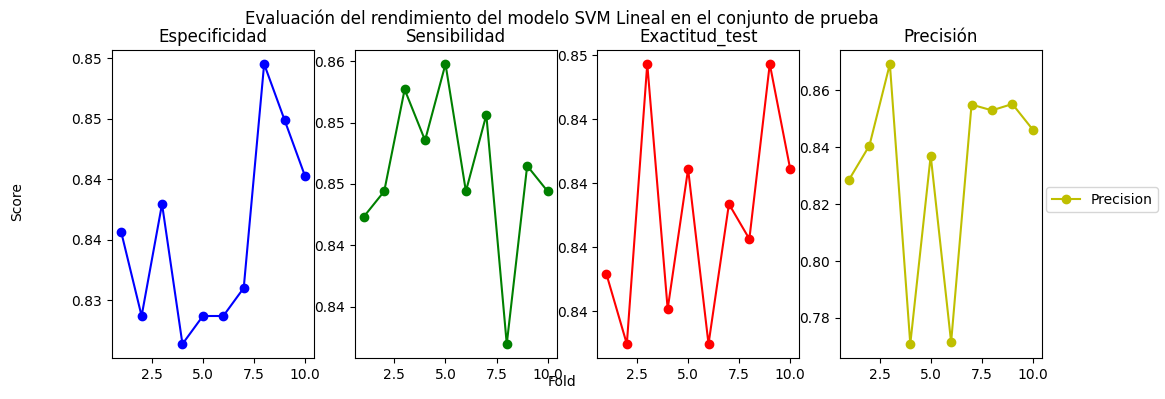

In [ ]:
import matplotlib.pyplot as plt

# Extract the results from results_knn
specificity = [r['specificity'] for r in results_svm]
sensitivity = [r['sensitivity'] for r in results_svm]
test_scores = [result['test_score'] for result in results_svm]
precision = [r['precision'] for r in results_svm]

# Create a new figure with subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Plot the values for each metric
axes[0].plot(range(1, 11), specificity, 'bo-')
axes[0].set_title('Especificidad')
axes[0].yaxis.set_major_formatter('{:.2f}'.format)
axes[1].plot(range(1, 11), sensitivity, 'go-')
axes[1].set_title('Sensibilidad')
axes[1].yaxis.set_major_formatter('{:.2f}'.format)
axes[2].plot(range(1, 11), test_scores, 'ro-')
axes[2].set_title('Exactitud_test')
axes[2].yaxis.set_major_formatter('{:.2f}'.format)
axes[3].plot(range(1, 11), precision, 'yo-', label='Precision')
axes[3].set_title('Precisión')
axes[3].yaxis.set_major_formatter('{:.2f}'.format)

# Add legend to the plot
fig.legend(loc='center right')

# Set common axis labels and a main title
fig.suptitle('Evaluación del rendimiento del modelo SVM Lineal en el conjunto de prueba')
fig.text(0.5, 0.04, 'Fold', ha='center')
fig.text(0.04, 0.5, 'Score', va='center', rotation='vertical')

# Show the plot
plt.show()


In [ ]:
test_scores_mean = round(np.mean(test_scores), 2)
#train_scores_mean = round(np.mean(train_scores), 2)
specificity_scores_mean = round(np.mean(specificity), 2)
sensitivity_scores_mean = round(np.mean(sensitivity), 2)
precision_mean = round(np.mean(precision), 2)

import pandas as pd

# Crear un diccionario con los resultados
results_dict = {
    'Exáctitud': [test_scores_mean],
    'Sensibilidad': [sensitivity_scores_mean],
    'Especificidad': [specificity_scores_mean],
    'Precisión': [precision_mean]
}

# Crear un dataframe con los resultados
results_df = pd.DataFrame(results_dict)

In [ ]:
print(results_df)

   Exáctitud  Sensibilidad  Especificidad  Precisión
0       0.84          0.85           0.84       0.83


## SVM RBF

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Definir los parámetros del modelo y los rangos de búsqueda
svm_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.1, 1],
    'kernel': ['rbf']
}
svm_model = SVC()

# Definir los datos de entrenamiento y prueba
#X = np.array(X)
#y = np.array(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Realizar la evaluación externa con k-fold
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realizar la evaluación externa e interna
results_svm = []
for i, (train_index, test_index) in enumerate(tqdm(outer_cv.split(X_train))):
    print(f"Iteration {i+1}")
    inner_X_train, inner_X_val = X_train[train_index], X_train[test_index]
    inner_y_train, inner_y_val = y_train[train_index], y_train[test_index]

    random_search = RandomizedSearchCV(svm_model, svm_params, n_iter=10, random_state=42, cv=5, scoring='accuracy', verbose=2)
    random_search.fit(inner_X_train, inner_y_train)
    # Realizar la evaluación interna con split normal
    #inner_X_train, inner_X_val, inner_y_train, inner_y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    best_params = random_search.best_params_
    inner_score = random_search.score(inner_X_val, inner_y_val)
    y_pred = random_search.predict(inner_X_val)

    # Calcular la matriz de confusión
    cm = confusion_matrix(inner_y_val, y_pred)
    # Calcular la sensibilidad y especificidad
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

    # Realizar la evaluación externa con k-fold cross validation
    outer_scores = cross_val_score(random_search, X_train, y_train, cv=outer_cv, scoring='accuracy')

    #Evaluar el conjunto de prueba externa
    y_pred_test = random_search.predict(X_test)
    test_score = random_search.score(X_test, y_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    specificity_test = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])
    sensitivity_test = cm_test[1, 1] / (cm_test[1, 0] + cm_test[1, 1])
    precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    #plot_confusion_matrix(inner_y_val,y_pred)

    results_svm.append({
    'model': svm_model,
    'best_params': best_params,
    'train_score': inner_score,
    'cv_scores_mean': outer_scores.mean(),
    'cv_scores_std': outer_scores.std(),
    'test_score': test_score,
    'confusion_matrix': cm_test,
    'specificity': specificity_test,
    'sensitivity': sensitivity_test,
    'precision': precision_test
})


In [ ]:
# Print the results
for result in results_svm:
    print(result)

{'model': SVC(), 'best_params': {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}, 'train_score': 0.7554744525547445, 'cv_scores_mean': 0.7747426539397343, 'cv_scores_std': 0.023018737670232502, 'test_score': 0.7986870897155361, 'confusion_matrix': array([[346,  86],
       [ 98, 384]]), 'specificity': 0.8009259259259259, 'sensitivity': 0.7966804979253111, 'precision': 0.7883211678832117}
{'model': SVC(), 'best_params': {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}, 'train_score': 0.7554744525547445, 'cv_scores_mean': 0.7747426539397343, 'cv_scores_std': 0.023018737670232502, 'test_score': 0.7888402625820569, 'confusion_matrix': array([[336,  96],
       [ 97, 385]]), 'specificity': 0.7777777777777778, 'sensitivity': 0.7987551867219918, 'precision': 0.7379310344827587}
{'model': SVC(), 'best_params': {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}, 'train_score': 0.7883211678832117, 'cv_scores_mean': 0.7747426539397343, 'cv_scores_std': 0.023018737670232502, 'test_score': 0.787746170678337, 'confu

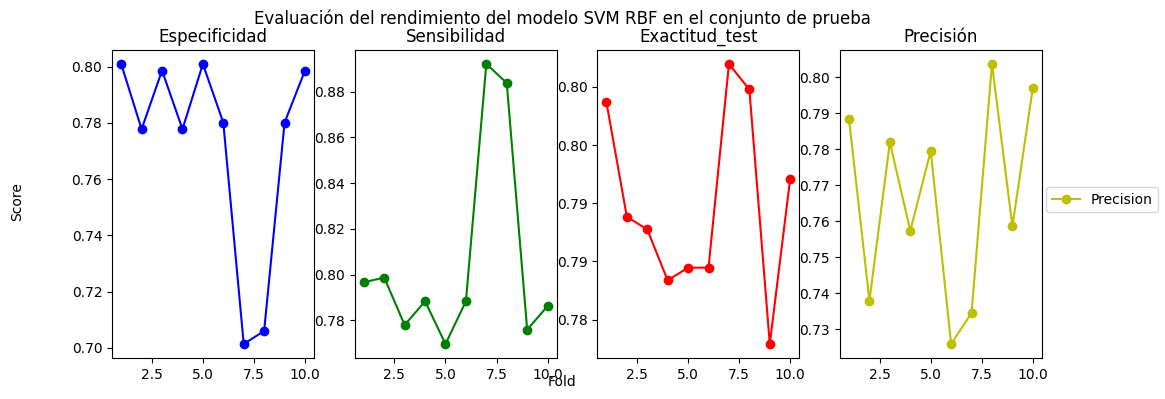

In [ ]:
import matplotlib.pyplot as plt

# Extract the results from results_knn
specificity = [r['specificity'] for r in results_svm]
sensitivity = [r['sensitivity'] for r in results_svm]
test_scores = [result['test_score'] for result in results_svm]
precision = [r['precision'] for r in results_svm]

# Create a new figure with subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Plot the values for each metric
axes[0].plot(range(1, 11), specificity, 'bo-')
axes[0].set_title('Especificidad')
axes[0].yaxis.set_major_formatter('{:.2f}'.format)
axes[1].plot(range(1, 11), sensitivity, 'go-')
axes[1].set_title('Sensibilidad')
axes[1].yaxis.set_major_formatter('{:.2f}'.format)
axes[2].plot(range(1, 11), test_scores, 'ro-')
axes[2].set_title('Exactitud_test')
axes[2].yaxis.set_major_formatter('{:.2f}'.format)
axes[3].plot(range(1, 11), precision, 'yo-', label='Precision')
axes[3].set_title('Precisión')
axes[3].yaxis.set_major_formatter('{:.2f}'.format)

# Add legend to the plot
fig.legend(loc='center right')

# Set common axis labels and a main title
fig.suptitle('Evaluación del rendimiento del modelo SVM RBF en el conjunto de prueba')
fig.text(0.5, 0.04, 'Fold', ha='center')
fig.text(0.04, 0.5, 'Score', va='center', rotation='vertical')

# Show the plot
plt.show()


In [ ]:
test_scores_mean = round(np.mean(test_scores), 2)
#train_scores_mean = round(np.mean(train_scores), 2)
specificity_scores_mean = round(np.mean(specificity), 2)
sensitivity_scores_mean = round(np.mean(sensitivity), 2)
precision_mean = round(np.mean(precision), 2)

import pandas as pd

# Crear un diccionario con los resultados
results_dict = {
    'Exáctitud': [test_scores_mean],
    'Sensibilidad': [sensitivity_scores_mean],
    'Especificidad': [specificity_scores_mean],
    'Precisión': [precision_mean]
}

# Crear un dataframe con los resultados
results_df = pd.DataFrame(results_dict)

# Mostrar el dataframe
print(results_df)

   Exáctitud  Sensibilidad  Especificidad  Precisión
0       0.79          0.81           0.77       0.77


## KNN

In [ ]:
#  Realizar la evaluación externa e interna
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix

knn_params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}
knn_model = KNeighborsClassifier()

# Definir los datos de entrenamiento y prueba
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Realizar la evaluación externa con k-fold
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
results_knn = []
for i, (train_index, test_index) in enumerate(outer_cv.split(X_train)):
    print(f"Iteration {i+1}")
    inner_X_train, inner_X_val = X_train[train_index], X_train[test_index]
    inner_y_train, inner_y_val = y_train[train_index], y_train[test_index]

    random_search_knn = RandomizedSearchCV(knn_model, knn_params, n_iter=20, random_state=42, cv=5, scoring='accuracy', verbose=2)
    random_search_knn.fit(inner_X_train, inner_y_train)
    best_params = random_search_knn.best_params_
    inner_score = random_search_knn.score(inner_X_val, inner_y_val)
    y_pred = random_search_knn.predict(inner_X_val)

    # Calcular la matriz de confusión
    cm = confusion_matrix(inner_y_val, y_pred)
    # Calcular la sensibilidad y especificidad
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

    # Realizar la evaluación externa con k-fold cross validation
    outer_scores = cross_val_score(random_search_knn, inner_X_train, inner_y_train, cv=5, scoring='accuracy')

    # Evaluar en conjunto de prueba externa
    y_pred_test = random_search_knn.predict(X_test)
    test_score = random_search_knn.score(X_test, y_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    specificity_test = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])
    sensitivity_test = cm_test[1, 1] / (cm_test[1, 0] + cm_test[1, 1])
    precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])

    results_knn.append({
        'model': knn_model,
        'best_params': best_params,
        'train_score': inner_score,
        'cv_scores_mean': outer_scores.mean(),
        'cv_scores_std': outer_scores.std(),
        'test_score': test_score,
        'confusion_matrix': cm_test,
        'specificity': specificity_test,
        'sensitivity': sensitivity_test,
        'precision': precision_test
    })

In [ ]:
# Print the results
for result in results_knn:
    print(result)

{'model': KNeighborsClassifier(), 'best_params': {'p': 1, 'n_neighbors': 10, 'algorithm': 'auto'}, 'train_score': 0.7737226277372263, 'cv_scores_mean': 0.8141987829614605, 'cv_scores_std': 0.02074922815828708, 'test_score': 0.8227571115973742, 'confusion_matrix': array([[379,  53],
       [109, 373]]), 'specificity': 0.8773148148148148, 'sensitivity': 0.7738589211618258, 'precision': 0.8387096774193549}
{'model': KNeighborsClassifier(), 'best_params': {'p': 1, 'n_neighbors': 10, 'algorithm': 'auto'}, 'train_score': 0.8357664233576643, 'cv_scores_mean': 0.8154158215010142, 'cv_scores_std': 0.015920013687909577, 'test_score': 0.8238512035010941, 'confusion_matrix': array([[373,  59],
       [102, 380]]), 'specificity': 0.8634259259259259, 'sensitivity': 0.7883817427385892, 'precision': 0.8321167883211679}
{'model': KNeighborsClassifier(), 'best_params': {'p': 1, 'n_neighbors': 10, 'algorithm': 'auto'}, 'train_score': 0.7992700729927007, 'cv_scores_mean': 0.8154158215010142, 'cv_scores_st

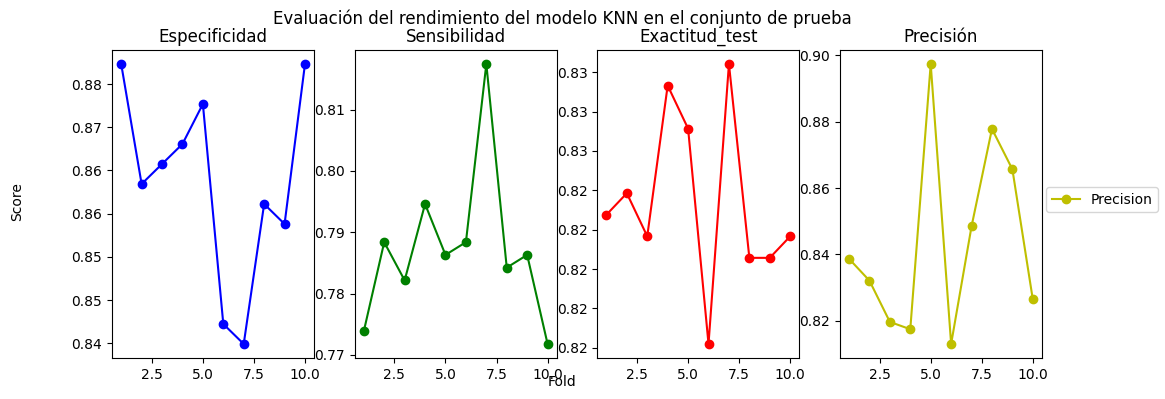

In [ ]:
import matplotlib.pyplot as plt

# Extract the results from results_knn
specificity = [r['specificity'] for r in results_knn]
sensitivity = [r['sensitivity'] for r in results_knn]
test_scores = [result['test_score'] for result in results_knn]
precision = [r['precision'] for r in results_knn]

# Create a new figure with subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Plot the values for each metric
axes[0].plot(range(1, 11), specificity, 'bo-')
axes[0].set_title('Especificidad')
axes[0].yaxis.set_major_formatter('{:.2f}'.format)
axes[1].plot(range(1, 11), sensitivity, 'go-')
axes[1].set_title('Sensibilidad')
axes[1].yaxis.set_major_formatter('{:.2f}'.format)
axes[2].plot(range(1, 11), test_scores, 'ro-')
axes[2].set_title('Exactitud_test')
axes[2].yaxis.set_major_formatter('{:.2f}'.format)
axes[3].plot(range(1, 11), precision, 'yo-', label='Precision')
axes[3].set_title('Precisión')
axes[3].yaxis.set_major_formatter('{:.2f}'.format)

# Add legend to the plot
fig.legend(loc='center right')

# Set common axis labels and a main title
fig.suptitle('Evaluación del rendimiento del modelo KNN en el conjunto de prueba')
fig.text(0.5, 0.04, 'Fold', ha='center')
fig.text(0.04, 0.5, 'Score', va='center', rotation='vertical')

# Show the plot
plt.show()


In [ ]:
test_scores_mean = round(np.mean(test_scores), 2)
#train_scores_mean = round(np.mean(train_scores), 2)
specificity_scores_mean = round(np.mean(specificity), 2)
sensitivity_scores_mean = round(np.mean(sensitivity), 2)
precision_mean = round(np.mean(precision), 2)

In [ ]:
import pandas as pd

# Crear un diccionario con los resultados
results_dict = {
    'Exáctitud': [test_scores_mean],
    'Sensibilidad': [sensitivity_scores_mean],
    'Especificidad': [specificity_scores_mean],
    'Precisión': [precision_mean]
}

# Crear un dataframe con los resultados
results_df = pd.DataFrame(results_dict)

# Mostrar el dataframe
print(results_df)


   Exáctitud  Sensibilidad  Especificidad  Precisión
0       0.82          0.79           0.86       0.84
